In [399]:
import numpy as np
import scipy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

from scipy.interpolate import lagrange
from numpy import linalg
import numpy.polynomial.polynomial as poly

from math import sqrt

---

## Interpolation Polynomials

In [400]:
def even_samples(num_points):
    return np.linspace(0,np.pi,num_points)

def ran_samples(num_points):
    return np.random.rand(num_points)*np.pi

def trig(x):
    return  2*np.cos(x)+np.sin(2*x)+np.sqrt(x)



In [401]:
x_ran = ran_samples(8)
x_even = even_samples(8)

y_ran = trig(x_ran)
y_even = trig(x_even)

In [402]:
f_even = lagrange(x_even, y_even)
f_ran = lagrange(x_ran, y_ran)

In [403]:
def La_pol(x,y,o):
    sum = 0
    for i in range(len(x)):
        prod = y[i]
        for j in range(len(x)):
            if i!=j:
                prod = prod*(o-x[j])/(x[i]-x[j])
        sum = sum + prod
    return sum

In [404]:
f_even = La_pol(x_even,y_even,np.linspace(min(x_even),max(x_even),500))
f_ran = La_pol(x_ran,y_ran,np.linspace(min(x_ran),max(x_ran),500))

#prange_even = np.linspace(min(x_even),max(x_even),500)
#prange_ran = np.linspace(min(x_ran),max(x_ran),500)

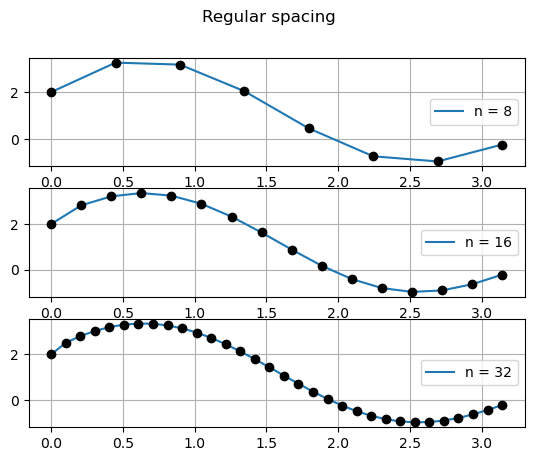

In [405]:
plt.suptitle('Regular spacing')

# * First Figure
plt.subplot(3, 1, 1)
plt.plot(even_samples(8),La_pol(x_even,y_even,even_samples(8)))
plt.plot(x_even, y_even, 'ko')
plt.grid(True)
plt.legend(['n = 8'], loc='center right')

# * Second Figure
plt.subplot(3, 1, 2)
plt.plot(even_samples(16),La_pol(even_samples(16),trig(even_samples(16)),even_samples(16)))
plt.plot(even_samples(16),trig(even_samples(16)), 'ko')
plt.grid(True)
plt.legend(['n = 16'], loc='center right')

# * Third Figure
plt.subplot(3, 1, 3)
plt.plot(even_samples(32),La_pol(even_samples(32),trig(even_samples(32)),even_samples(32)))
plt.plot(even_samples(32),trig(even_samples(32)), 'ko')
plt.grid(True)
plt.legend(['n = 32'], loc='center right')

plt.show()

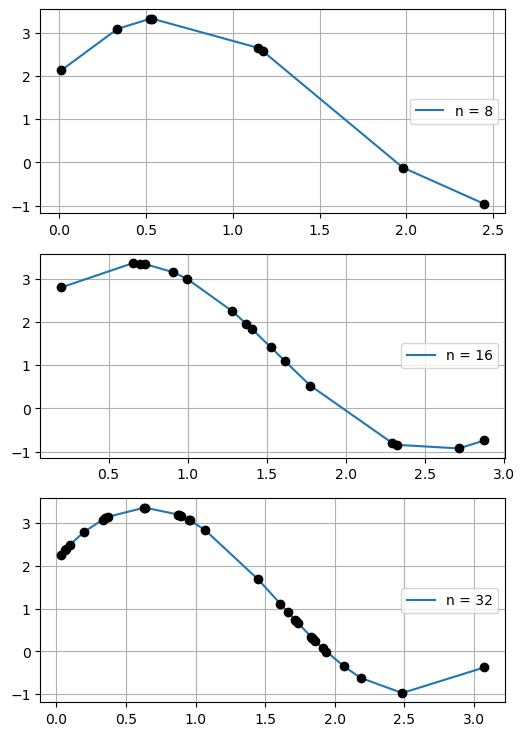

In [406]:

# * First Figure
x = ran_samples(8)
x = np.sort(x)
y = trig(x)

plt.figure(figsize=(6, 9))  # Adjust the figure size here

plt.subplot(3, 1, 1)
plt.plot(x,La_pol(x,y,x))
plt.plot(x,y, 'ko')
plt.grid(True)
plt.legend(['n = 8'], loc='center right')

# * Second Figure
x = ran_samples(16)
x = np.sort(x)
y = trig(x)

plt.subplot(3, 1, 2)
plt.plot(x,La_pol(x,y,x))
plt.plot(x,y, 'ko')
plt.grid(True)
plt.legend(['n = 16'], loc='center right')

# * Third Figure
x = ran_samples(32)
x = np.sort(x)
y = trig(x)

plt.subplot(3, 1, 3)
plt.plot(x,La_pol(x,y,x))
plt.plot(x,y, 'ko')
plt.grid(True)
plt.legend(['n = 32'], loc='center right')

plt.show()

---

## Splines

In [407]:
cubic_interp1d([x_even[0]],x_even,y_even)

array([2.])

In [408]:
def cubic_interpolate(x0, x, y):

    xdiff = np.diff(x)
    dydx = np.diff(y)
    dydx /= xdiff

    n = size = len(x)

    w = np.empty(n-1, float)
    z = np.empty(n, float)

    w[0] = 0.
    z[0] = 0.
    for i in range(1, n-1):
        m = xdiff[i-1] * (2 - w[i-1]) + 2 * xdiff[i]
        w[i] = xdiff[i] / m
        z[i] = (6*(dydx[i] - dydx[i-1]) - xdiff[i-1]*z[i-1]) / m
    z[-1] = 0.

    for i in range(n-2, -1, -1):
        z[i] = z[i] - w[i]*z[i+1]

    # find index (it requires x0 is already sorted)
    index = x.searchsorted(x0)
    np.clip(index, 1, size-1, index)

    xi1, xi0 = x[index], x[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0

    # calculate cubic
    f0 = zi0/(6*hi1)*(xi1-x0)**3 + \
        zi1/(6*hi1)*(x0-xi0)**3 + \
        (yi1/hi1 - zi1*hi1/6)*(x0-xi0) + \
        (yi0/hi1 - zi0*hi1/6)*(xi1-x0)
    return f0

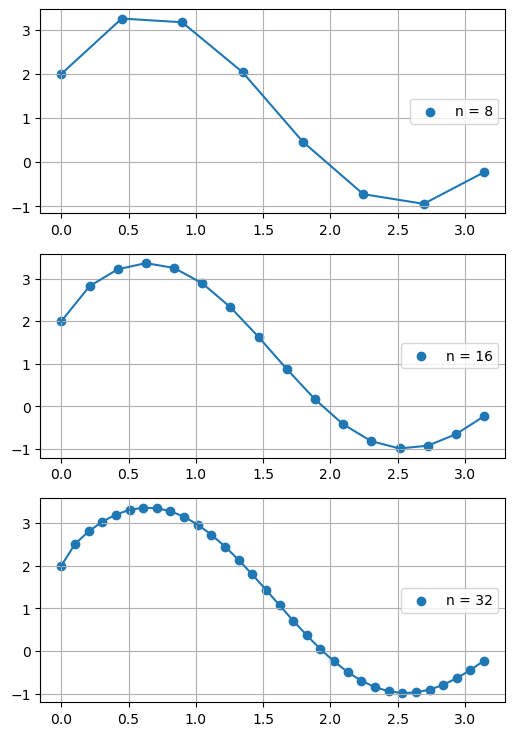

In [409]:

# * First Figure
x = even_samples(8)
y = trig(even_samples(8))
plt.figure(figsize=(6, 9))  
plt.subplot(3, 1, 1)
plt.scatter(x, y)
plt.plot(x, cubic_interpolate(x,x,y))
plt.grid(True)

plt.legend(['n = 8'], loc='center right')

# * Second Figure
x = even_samples(16)
y = trig(even_samples(16))
plt.subplot(3, 1, 2)
plt.scatter(x, y)
plt.plot(x, cubic_interpolate(x,x,y))
plt.grid(True)

plt.legend(['n = 16'], loc='center right')

# * Thirds Figure
x = even_samples(32)
y = trig(even_samples(32))
plt.subplot(3, 1, 3)
plt.scatter(x, y)
plt.plot(x, cubic_interpolate(x,x,y))
plt.grid(True)

plt.legend(['n = 32'], loc='center right')

plt.show()

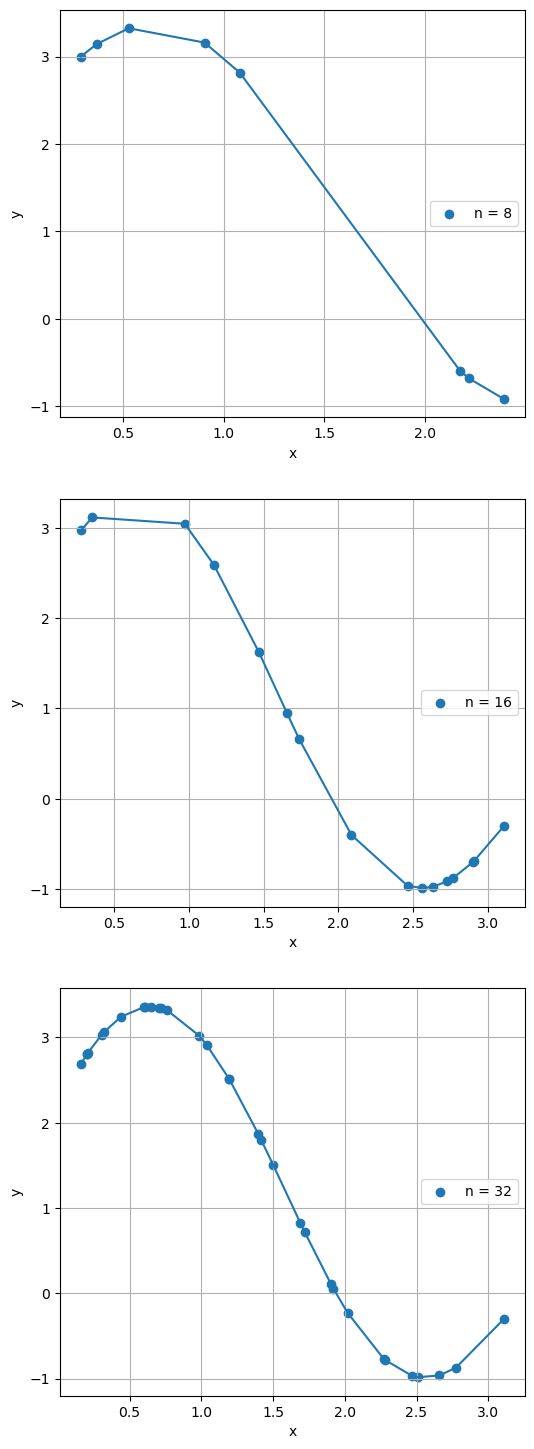

In [410]:

plt.figure(figsize=(6, 18))  # Adjust the figure size here

# * First Figure
x = ran_samples(8)
x = np.sort(x)
y = trig(x)
plt.subplot(3, 1, 1)
plt.scatter(x, y)

x_new = np.linspace(0, 10, 201)
plt.plot(x, cubic_interpolate(x,x,y))

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend(['n = 8'], loc='center right')

# * Second Figure
x = ran_samples(16)
x = np.sort(x)
y = trig(x)
plt.subplot(3, 1, 2)
plt.scatter(x, y)

x_new = np.linspace(0, 10, 201)
plt.plot(x, cubic_interpolate(x,x,y))

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend(['n = 16'], loc='center right')

# * Third Figure
x = ran_samples(32)
x = np.sort(x)
y = trig(x)
plt.subplot(3, 1, 3)
plt.scatter(x, y)

x_new = np.linspace(0, 10, 201)
plt.plot(x, cubic_interpolate(x,x,y))

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend(['n = 32'], loc='center right')

plt.show()

---

# Least Squares

---
# XXZ Spin Model

In [411]:

# * Storing variables for convinience
Variables = {}

## * Main Objects
Variables['sx'] = np.array( 
    [[0,1],[1,0]]
)

Variables['sz'] = np.array(
    [[1,0],[0,-1]]
)

### * Idetity Matrix
Variables['Id'] = np.identity(2)

### * Number of spins
Variables['N'] = 5

J_x = np.random.rand()

J_z = np.random.rand()

g = J_x/J_z

In [412]:

## * Main Objects
sx = np.array( 
    [[0,1],[1,0]]
)

sz = np.array(
    [[1,0],[0,-1]]
)

### * Idetity Matrix
Id = np.identity(2)

### * Number of spins
N = 50

J_x = np.random.rand()

J_z = np.random.rand()

g = J_x/J_z

In [413]:
def m_z(H, sigma_z):

    # * Eigensolver
    e_vals,e_vecs = linalg.eigh(H)

    # * Ground state Expectation Value
    # return sum([i.T @ sigma_z @ i for i in e_vecs])/N
    return (e_vecs[0].T @ sigma_z @ e_vecs[0])/N

def H_g(g):
    
    # * Extracting varuables
    # sx = Variables['sx']
    # sz = Variables['sz']
    # Id = Variables['Id']
    # N = Variables['N']
    # J_x = Variables['J_x']
    # J_z = Variables['J_z']
    
    # * Storing elements
    spin_x = {}
    spin_z = {}

    # * x Interaction
    for i in range(1,N-1): # TODO: This can be vectorized
        spin_x[f"sx_{i},sx_{i+1}"] = np.kron(sx,sx)

    ## * Closing the chain
    spin_x[f"sx_{4},sx_{0}"] = np.kron(sx,sx)

    # * z Interaction
    for i in range(1,N-1): # TODO: This can be vectorized
        spin_z[f"sz_{i}"] = np.kron(sz,Id)

    # * Hamiltonian Contributions
    sx_cont = sum(spin_x.values())
    sz_cont = sum(spin_z.values())

    H = sx_cont + (1/g)*sz_cont

    return m_z(H, sz_cont)

def H_ginv(g):
    # * Extracting varuables
    # sx = Variables['sx']
    # sz = Variables['sz']
    # Id = Variables['Id']
    # N = Variables['N']
    # J_x = Variables['J_x']
    # J_z = Variables['J_z']
    
    # * Storing elements
    spin_x = {}
    spin_z = {}

    # * x Interaction
    for i in range(1,N-1): # TODO: This can be vectorized
        spin_x[f"sx_{i},sx_{i+1}"] = np.kron(sx,sx)

    ## * Closing the chain
    spin_x[f"sx_{4},sx_{0}"] = np.kron(sx,sx)

    # * z Interaction
    for i in range(1,N-1): # TODO: This can be vectorized
        spin_z[f"sz_{i}"] = np.kron(sz,Id)

    # * Hamiltonian Contributions
    sx_cont = sum(spin_x.values())
    sz_cont = sum(spin_z.values())

    H = g*sx_cont + sz_cont

    return m_z(H, sz_cont)


Text(0, 0.5, 'Energy')

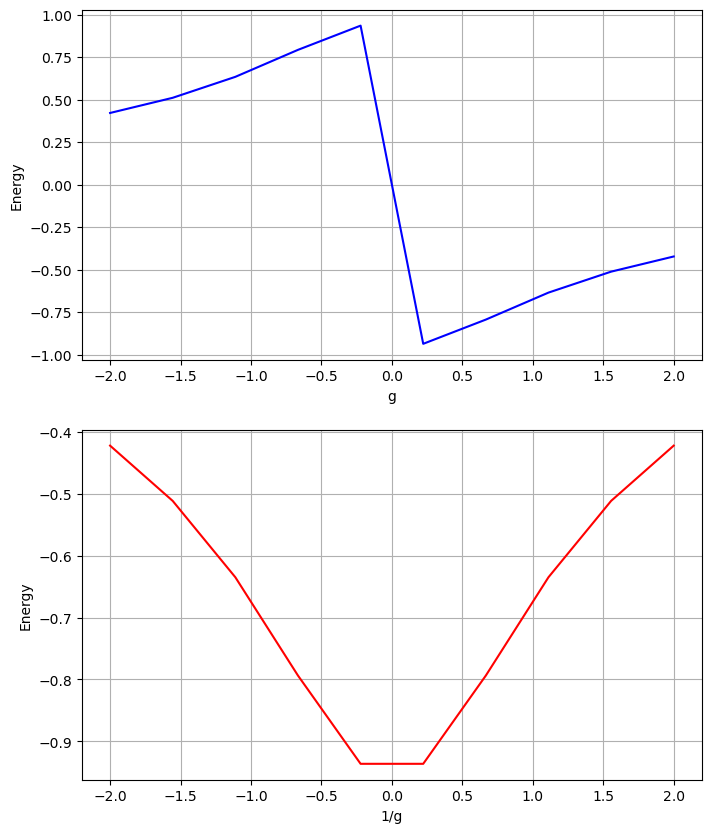

In [414]:

# * Variation of g
g_vals = np.linspace(-2,2,10)

VEC_H_g = np.vectorize(H_g)
VEC_H_ginv = np.vectorize(H_ginv)

H_g_vals = VEC_H_g(g_vals)
H_ginv_vals = VEC_H_ginv(g_vals)

data = {
    'g_vals' : g_vals,
    'H_g_vals' : H_g_vals,
    'H_ginv_vals' : H_ginv_vals
}

df = pd.DataFrame(data)

fig, axs = subplots(2, 1, figsize=(8, 10))
sns.lineplot(
    data=df,
    x='g_vals',
    y='H_g_vals',
    color='blue',
    ax=axs[0]
)

sns.lineplot(
    data=df,
    x='g_vals',
    y='H_ginv_vals',
    color='red',
    ax=axs[1]
)
axs[0].grid(True)
axs[1].grid(True)

axs[0].set_xlabel('g')
axs[0].set_ylabel('Energy')
axs[1].set_xlabel('1/g')
axs[1].set_ylabel('Energy')

Text(0, 0.5, 'Energy')

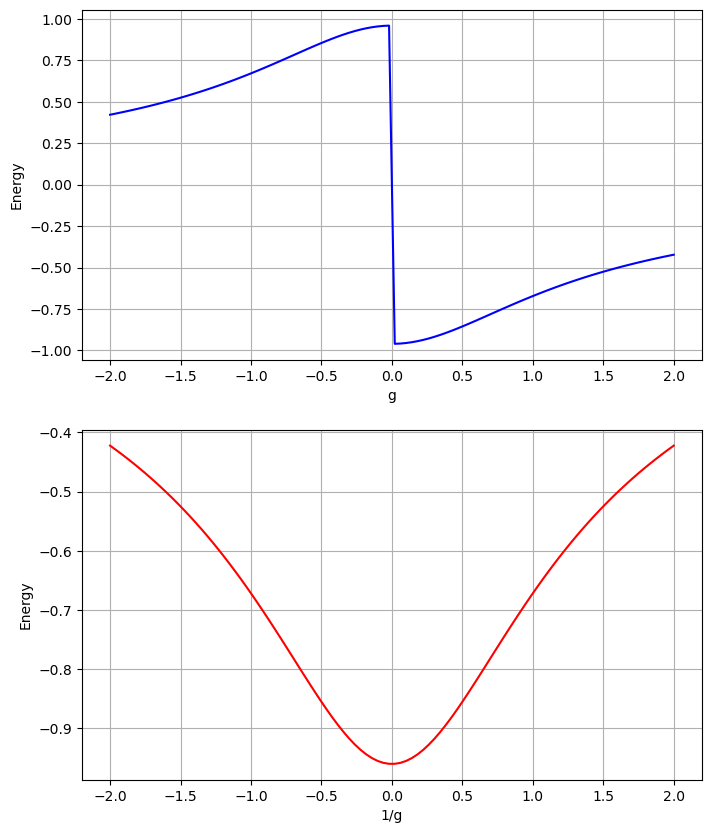

In [415]:

# * Variation of g
g_vals = np.linspace(-2,2,100)

VEC_H_g = np.vectorize(H_g)
VEC_H_ginv = np.vectorize(H_ginv)

H_g_vals = VEC_H_g(g_vals)
H_ginv_vals = VEC_H_ginv(g_vals)

data = {
    'g_vals' : g_vals,
    'H_g_vals' : H_g_vals,
    'H_ginv_vals' : H_ginv_vals
}

df = pd.DataFrame(data)

fig, axs = subplots(2, 1, figsize=(8, 10))
sns.lineplot(
    data=df,
    x='g_vals',
    y='H_g_vals',
    color='blue',
    ax=axs[0]
)

sns.lineplot(
    data=df,
    x='g_vals',
    y='H_ginv_vals',
    color='red',
    ax=axs[1]
)
axs[0].grid(True)
axs[1].grid(True)

axs[0].set_xlabel('g')
axs[0].set_ylabel('Energy')
axs[1].set_xlabel('1/g')
axs[1].set_ylabel('Energy')

Text(0, 0.5, 'Energy')

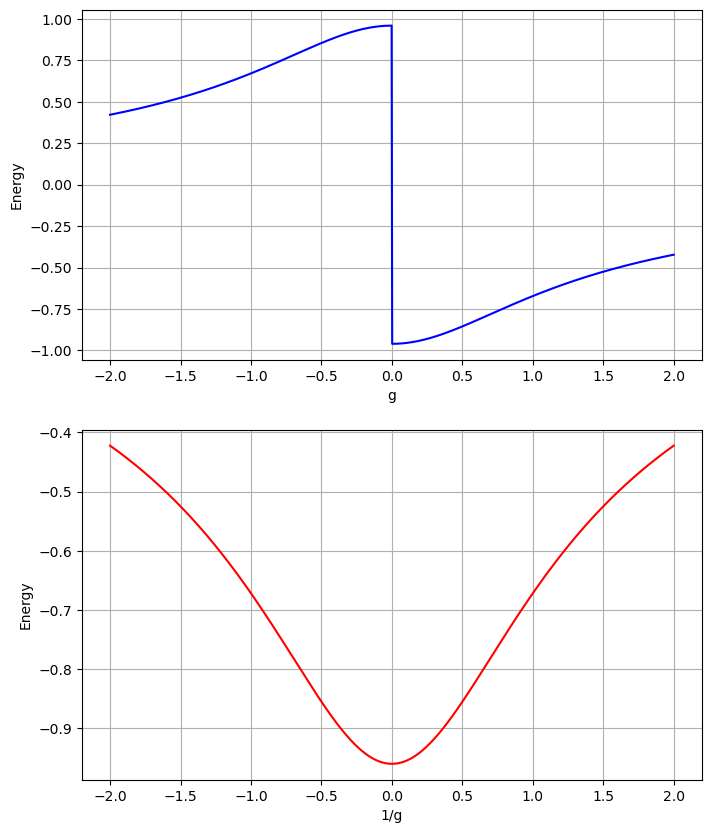

In [416]:

# * Variation of g
g_vals = np.linspace(-2,2,1000)

VEC_H_g = np.vectorize(H_g)
VEC_H_ginv = np.vectorize(H_ginv)

H_g_vals = VEC_H_g(g_vals)
H_ginv_vals = VEC_H_ginv(g_vals)

data = {
    'g_vals' : g_vals,
    'H_g_vals' : H_g_vals,
    'H_ginv_vals' : H_ginv_vals
}

df = pd.DataFrame(data)

fig, axs = subplots(2, 1, figsize=(8, 10))
sns.lineplot(
    data=df,
    x='g_vals',
    y='H_g_vals',
    color='blue',
    ax=axs[0]
)

sns.lineplot(
    data=df,
    x='g_vals',
    y='H_ginv_vals',
    color='red',
    ax=axs[1]
)
axs[0].grid(True)
axs[1].grid(True)

axs[0].set_xlabel('g')
axs[0].set_ylabel('Energy')
axs[1].set_xlabel('1/g')
axs[1].set_ylabel('Energy')

In [417]:
# TODO: Compare with exact solution

---
# Bose-Hubard Model

$H=-t\sum _{\left\langle i,j\right\rangle }\left({\hat {b}}_{i}^{\dagger }{\hat {b}}_{j}+{\hat {b}}_{j}^{\dagger }{\hat {b}}_{i}\right)+{\frac {U}{2}}\sum _{i}{\hat {n}}_{i}\left({\hat {n}}_{i}-1\right)-\mu \sum _{i}{\hat {n}}_{i}$

In [418]:
from numpy import linalg

In [437]:

# * Main Objects

## * Number of sites
N = 7

## * Param
t = np.random.rand()
U = np.random.rand()
mu = np.random.rand()
g = t/U

# * Creation & Annihilation operators
'''
I'm using creation and annihilation operators from the Quantum Harmonic Oscilator,
which I know it may not be the best choice of operators.
'''
def b_op(N):
    values = np.sqrt(np.arange(1, N))
    matrix = np.zeros((N, N))
    np.fill_diagonal(matrix[1:], values)
    return matrix

b = b_op(N)
b_dag = b.T

## * Number Operator
def n_op(b):
    return b.T @ b

n = n_op(b)

Id = np.identity(N)

In [442]:
def fluc(Ham, m):
    
    # * Eigensolver
    e_vals,e_vecs = linalg.eigh(Ham)

    # * Computing Variance
    m2 = m @ m
    
    var = (e_vecs[0].T @ m2 @ e_vecs[0]) - (e_vecs[0].T @ m @ e_vecs[0])**2
    
    return var

def H_hb(N,g,U):
    
    # * Storing elements
    # b = b(N)
    # b_dag = b.T
    # n = n(b) 

    b_cont= {}
    n_n_cont = {}
    n_cont = {}

    # * b Interaction
    for i in range(1,N-1): # TODO: This can be vectorized
        b_cont[f"{i}{i+1}"] = np.kron(b,b_dag) + np.kron(b_dag,b)

    ## * Closing the chain
    b_cont[f"{N},{0}"] = np.kron(b,b_dag) + np.kron(b_dag,b)

    # * n(n-1) Interaction
    for i in range(1,N-1): # TODO: This can be vectorized
        n_n_cont[f"{i}"] = np.kron(Id,n) * (np.kron(Id,n) - np.kron(Id,Id))

    # * n Interaction
    for i in range(1,N-1): # TODO: This can be vectorized
        n_cont[f"{i}"] = np.kron(n,Id)

    # * Hamiltonian Contributions
    b_sum = sum(b_cont.values())
    n_n_sum = sum(n_n_cont.values())
    n_sum = sum(n_cont.values())

    H = -g*b_sum + (1/2)*n_n_sum - (mu/U)*n_sum

    e_vals,e_vecs = linalg.eigh(H)

    fluc_per_site = fluc(H, n_cont['1'])

    return fluc_per_site

H_hb(10,2,2)

0.0

In [443]:

# * Variation of g
g_vals = np.linspace(-2,2,1000)
U_vals = t/g_vals

VEC_H_g = np.vectorize(H_hb)

H_g_vals = VEC_H_g(N,g_vals,U_vals)

data = {
    'g_vals' : g_vals,
    'H_g_vals' : H_g_vals,
}

df = pd.DataFrame(data)

In [444]:
df

,g_vals,H_g_vals
0,-2.000000,0.0
1,-1.995996,0.0
2,-1.991992,0.0
3,-1.987988,0.0
4,-1.983984,0.0
...,...,...
995,1.983984,0.0
996,1.987988,0.0
997,1.991992,0.0
998,1.995996,0.0


<Axes: xlabel='g_vals', ylabel='H_g_vals'>

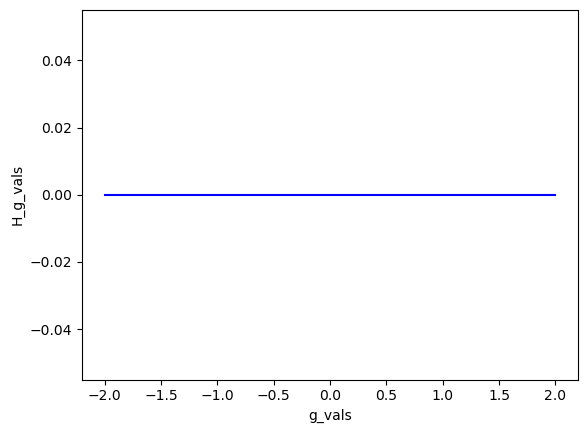

In [445]:
sns.lineplot(
    data=df,
    x='g_vals',
    y='H_g_vals',
    color='blue'
)